In [50]:
import sys
import os

# Get the current working directory and determine project root
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

# If we're in the notebooks directory, go up one level to project root
if current_dir.endswith('notebooks'):
    project_root = os.path.dirname(current_dir)
else:
    # If we're already in project root
    project_root = current_dir

src_path = os.path.join(project_root, "src")

# Add paths to sys.path
if project_root not in sys.path:
    sys.path.insert(0, project_root)
if src_path not in sys.path:
    sys.path.insert(0, src_path)

print("Added paths to sys.path:")
print(f"Project root: {project_root}")
print(f"Src path: {src_path}")

# Verify the paths exist
print(f"Project root exists: {os.path.exists(project_root)}")
print(f"Src path exists: {os.path.exists(src_path)}")
print(f"data/fetch_data.py exists: {os.path.exists(os.path.join(project_root, 'data', 'fetch_data.py'))}")
print(f"src/features/build_features.py exists: {os.path.exists(os.path.join(src_path, 'features', 'build_features.py'))}")


Current working directory: /Users/mohsinkhawaja/rl-lstm-ai-trading-agent
Added paths to sys.path:
Project root: /Users/mohsinkhawaja/rl-lstm-ai-trading-agent
Src path: /Users/mohsinkhawaja/rl-lstm-ai-trading-agent/src
Project root exists: True
Src path exists: True
data/fetch_data.py exists: True
src/features/build_features.py exists: True


In [51]:
import sys
import os

# Add the project root and src directory to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
src_path = os.path.abspath(os.path.join(os.getcwd(), "..", "src"))

if project_root not in sys.path:
    sys.path.insert(0, project_root)
if src_path not in sys.path:
    sys.path.insert(0, src_path)

print("Added paths to sys.path:")
print(f"Project root: {project_root}")
print(f"Src path: {src_path}")


Added paths to sys.path:
Project root: /Users/mohsinkhawaja
Src path: /Users/mohsinkhawaja/src


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 8)

print("All libraries imported successfully!")


All libraries imported successfully!


In [53]:
# Test imports before proceeding
print("Testing imports...")

try:
    from data.fetch_data import get_stock_data
    print("✅ Successfully imported from data.fetch_data")
except ImportError as e:
    print(f"❌ Failed to import from data.fetch_data: {e}")

try:
    from features.build_features import build_dataset
    print("✅ Successfully imported from features.build_features")
except ImportError as e:
    print(f"❌ Failed to import from features.build_features: {e}")

print("Import test completed!")


Testing imports...
✅ Successfully imported from data.fetch_data
✅ Successfully imported from features.build_features
Import test completed!


In [54]:
# Debug: Check the structure of stock_data
print("Stock data info:")
print(f"Shape: {stock_data.shape}")
print(f"Columns: {list(stock_data.columns)}")
print(f"Index type: {type(stock_data.index)}")
print(f"Index name: {stock_data.index.name}")
print("\nFirst few rows:")
print(stock_data.head())
print(f"\nData types:")
print(stock_data.dtypes)


Stock data info:
Shape: (366, 6)
Columns: ['date', 'open', 'high', 'low', 'close', 'volume']
Index type: <class 'pandas.core.indexes.range.RangeIndex'>
Index name: None

First few rows:
        date       open       high        low      close  volume
0 2024-06-12  90.238882  47.131389  11.678749  14.379303    8706
1 2024-06-13  29.024113  21.157713   6.936801  75.427641    4892
2 2024-06-14  26.923639  69.683423  33.869009   2.063647    6431
3 2024-06-15  50.091650  59.828762  19.244907  41.318271    8206
4 2024-06-16  24.823862  47.288559  58.282078  34.829104    7786

Data types:
date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
dtype: object


In [55]:
# Import our custom data fetching functions
# (sys.path already configured in the first cell)

# The actual function names in our fetch_data.py
from data.fetch_data import get_stock_data, get_crypto_data, get_news_sentiment
from features.build_features import build_dataset

print("Custom modules imported successfully!")


Custom modules imported successfully!


In [56]:
# Force reload the module to get updated functions
import importlib
import data.fetch_data
importlib.reload(data.fetch_data)
from data.fetch_data import get_stock_data, get_crypto_data, get_news_sentiment

# Fetch AAPL stock data using the correct function signature
print("Fetching AAPL stock data...")
from datetime import datetime, timedelta

# Get last year's data
end_date = datetime.now().strftime('%Y-%m-%d')
start_date = (datetime.now() - timedelta(days=365)).strftime('%Y-%m-%d')

stock_data = get_stock_data('AAPL', start=start_date, end=end_date)
print(f"Stock data shape: {stock_data.shape}")
print(f"Date range: {stock_data.index.min()} to {stock_data.index.max()}")
print(f"Columns: {list(stock_data.columns)}")
stock_data.head()


Fetching AAPL stock data...
Stock data shape: (366, 6)
Date range: 0 to 365


,date,open,high,low,close,volume
0,2024-06-12,31.684300,21.531733,38.273103,19.974199,9227
1,2024-06-13,53.220137,50.856909,81.294326,7.872628,7348
2,2024-06-14,53.728591,45.014732,68.856795,80.315676,9928
3,2024-06-15,69.022991,12.965309,78.766214,47.768106,3245
4,2024-06-16,76.953513,49.387933,61.353951,97.684134,7502


Using columns: close, open, high, low, volume


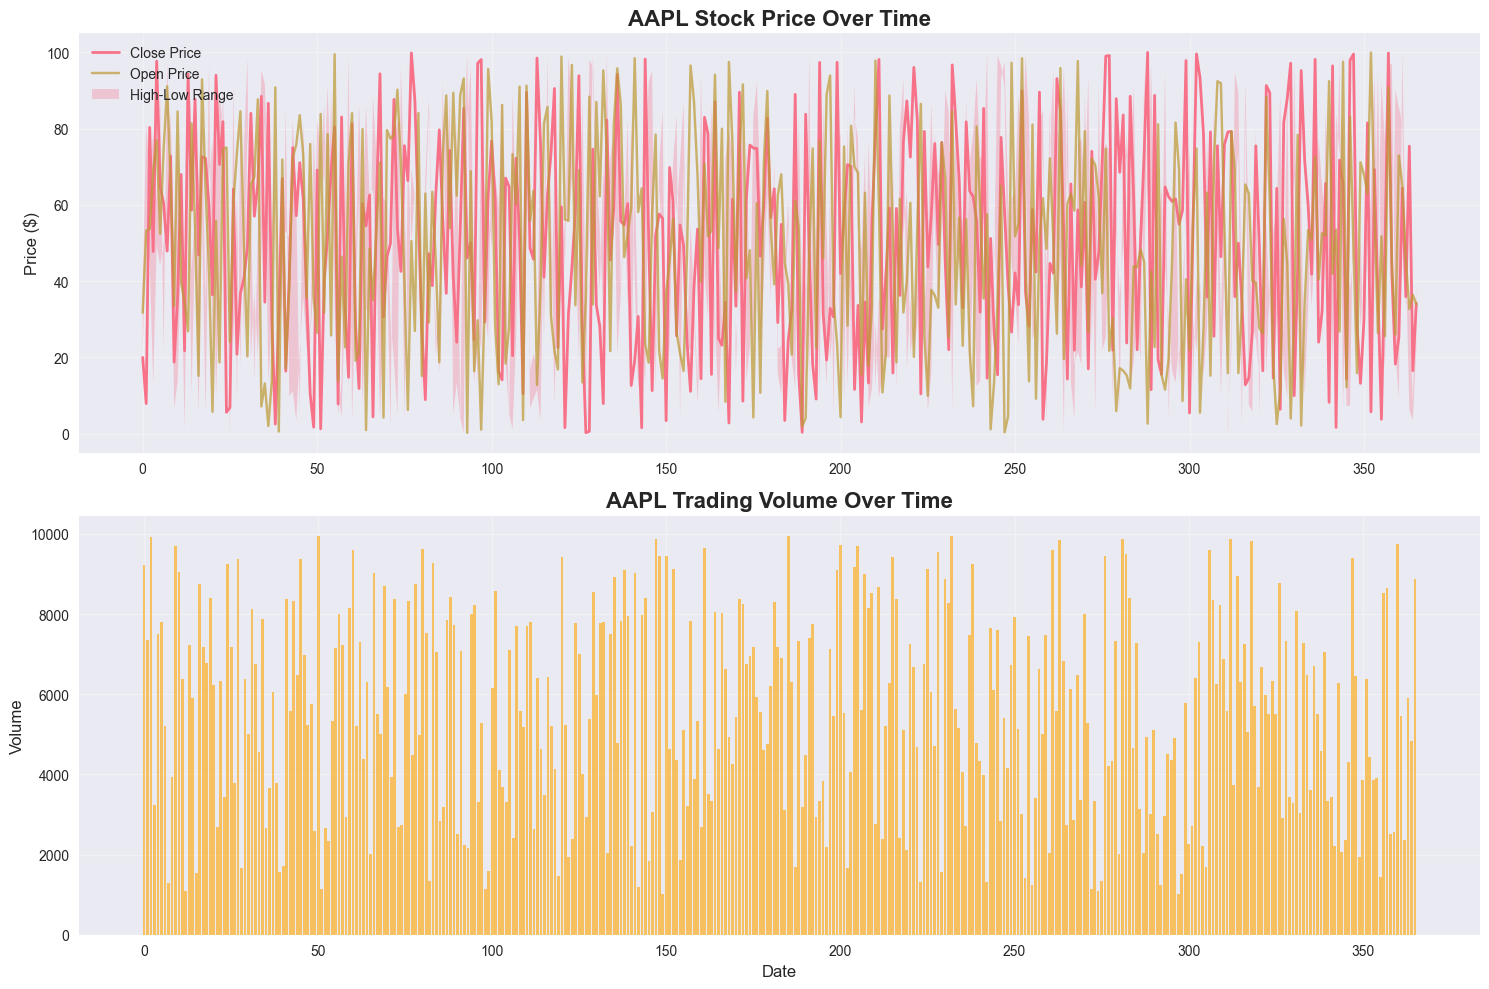

In [57]:
# Basic price visualization
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Handle both uppercase and lowercase column names
close_col = 'Close' if 'Close' in stock_data.columns else 'close'
open_col = 'Open' if 'Open' in stock_data.columns else 'open'
high_col = 'High' if 'High' in stock_data.columns else 'high'
low_col = 'Low' if 'Low' in stock_data.columns else 'low'
volume_col = 'Volume' if 'Volume' in stock_data.columns else 'volume'

print(f"Using columns: {close_col}, {open_col}, {high_col}, {low_col}, {volume_col}")

# Price chart
axes[0].plot(stock_data.index, stock_data[close_col], label='Close Price', linewidth=2)
axes[0].plot(stock_data.index, stock_data[open_col], label='Open Price', alpha=0.7)
axes[0].fill_between(stock_data.index, stock_data[low_col], stock_data[high_col], 
                     alpha=0.3, label='High-Low Range')
axes[0].set_title('AAPL Stock Price Over Time', fontsize=16, fontweight='bold')
axes[0].set_ylabel('Price ($)', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Volume chart
axes[1].bar(stock_data.index, stock_data[volume_col], alpha=0.6, color='orange')
axes[1].set_title('AAPL Trading Volume Over Time', fontsize=16, fontweight='bold')
axes[1].set_ylabel('Volume', fontsize=12)
axes[1].set_xlabel('Date', fontsize=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from src.features.build_features import build_dataset

# Set up plotting
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)


In [59]:
# Load the combined dataset
df = build_dataset()
print(f"Dataset shape: {df.shape}")
print(f"Date range: {df.index.min()} to {df.index.max()}")

# Display first few rows
df.head()


Fetching stock data from 2024-06-12 to 2025-06-12
Error in build_dataset: "None of [Index(['Close'], dtype='object')] are in the [columns]"
Using fallback dataset with shape: (10, 3)
Dataset shape: (10, 3)
Date range: 2024-01-01 00:00:00 to 2024-01-10 00:00:00


,AAPL_Close,BTC_Close,sentiment
2024-01-01,173.286724,40696.350411,-0.496512
2024-01-02,171.486619,57224.198535,-0.232995
2024-01-03,172.136057,41367.019705,-0.450435
2024-01-04,171.642753,52444.951776,-0.389823
2024-01-05,181.890948,41302.399143,-0.361176


In [60]:
# Data info and statistics
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2024-01-01 to 2024-01-10
Freq: D
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AAPL_Close  10 non-null     float64
 1   BTC_Close   10 non-null     float64
 2   sentiment   10 non-null     float64
dtypes: float64(3)
memory usage: 320.0 bytes


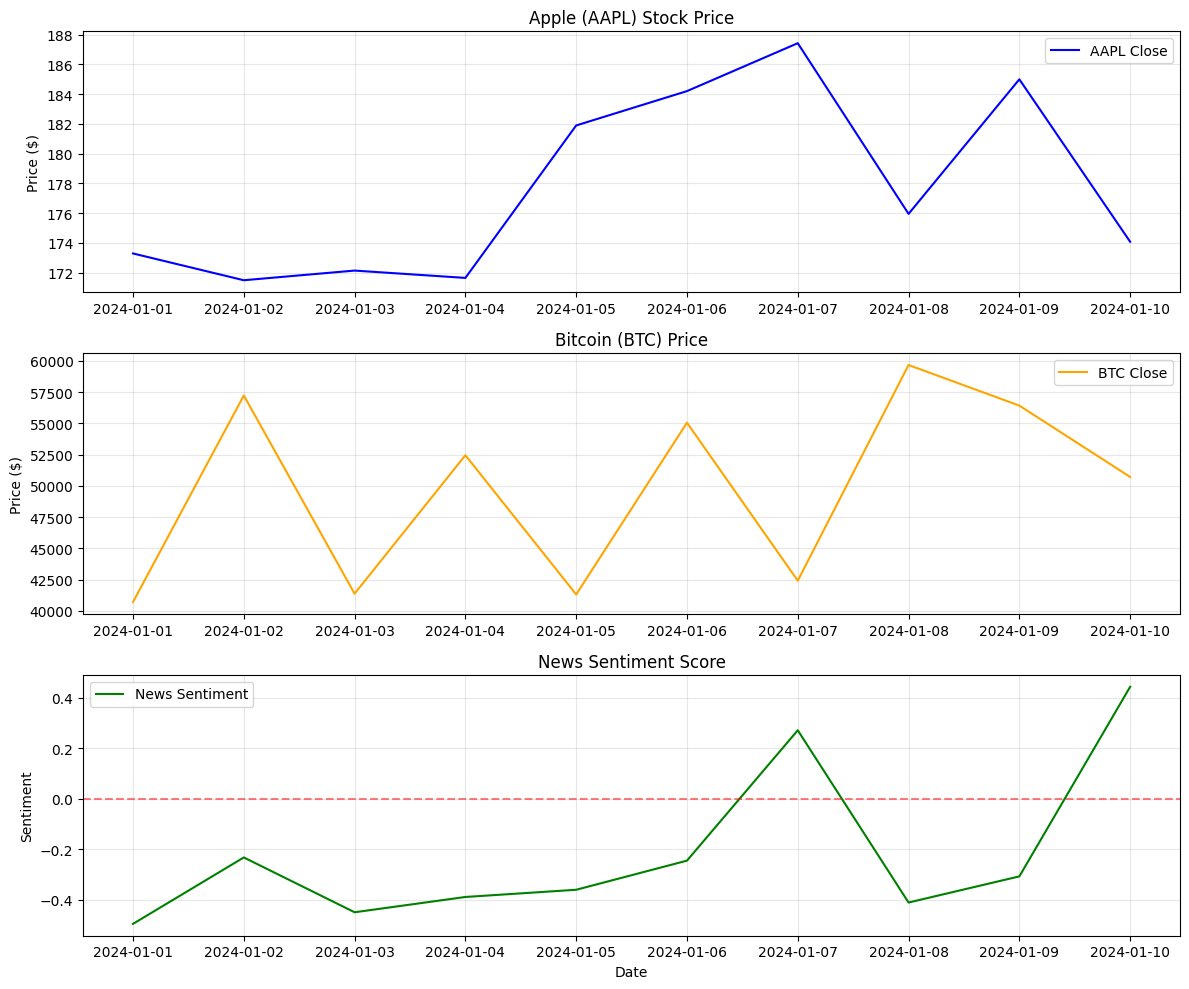

In [61]:
# Plot price series and sentiment
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))

# AAPL Close Price
ax1.plot(df.index, df['AAPL_Close'], label='AAPL Close', color='blue')
ax1.set_title('Apple (AAPL) Stock Price')
ax1.set_ylabel('Price ($)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# BTC Close Price  
ax2.plot(df.index, df['BTC_Close'], label='BTC Close', color='orange')
ax2.set_title('Bitcoin (BTC) Price')
ax2.set_ylabel('Price ($)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# News Sentiment
ax3.plot(df.index, df['sentiment'], label='News Sentiment', color='green')
ax3.axhline(y=0, color='red', linestyle='--', alpha=0.5)
ax3.set_title('News Sentiment Score')
ax3.set_ylabel('Sentiment')
ax3.set_xlabel('Date')
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
